In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Titanic Data Science Project

The present project is an attempt to predict whether a given passenger of the great Titanic died on its sinking based solely on basic information. The dataset is provided by [Kaggle](https://www.kaggle.com/c/titanic/data) and it is split in a training set file and a test set file.

# Preprocessing

## Loading the Dataset

In [2]:
train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Checking data structure

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Taking a look at those results we can notice by the column 'Non-Null Count' that probably are missing values for the features Age, Cabin and Embarked on the training set, and Age, Cabin and Fare on the test set.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Checking if there are missing values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As it was suspected, there are missing values. In order to deal with that properly, it is necessary to understand the data a little better.

## Visualizing raw data

As a way to perform some preliminary analysis, let us get only the numerical features and plot their histograms.

In [9]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
features_numeric = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


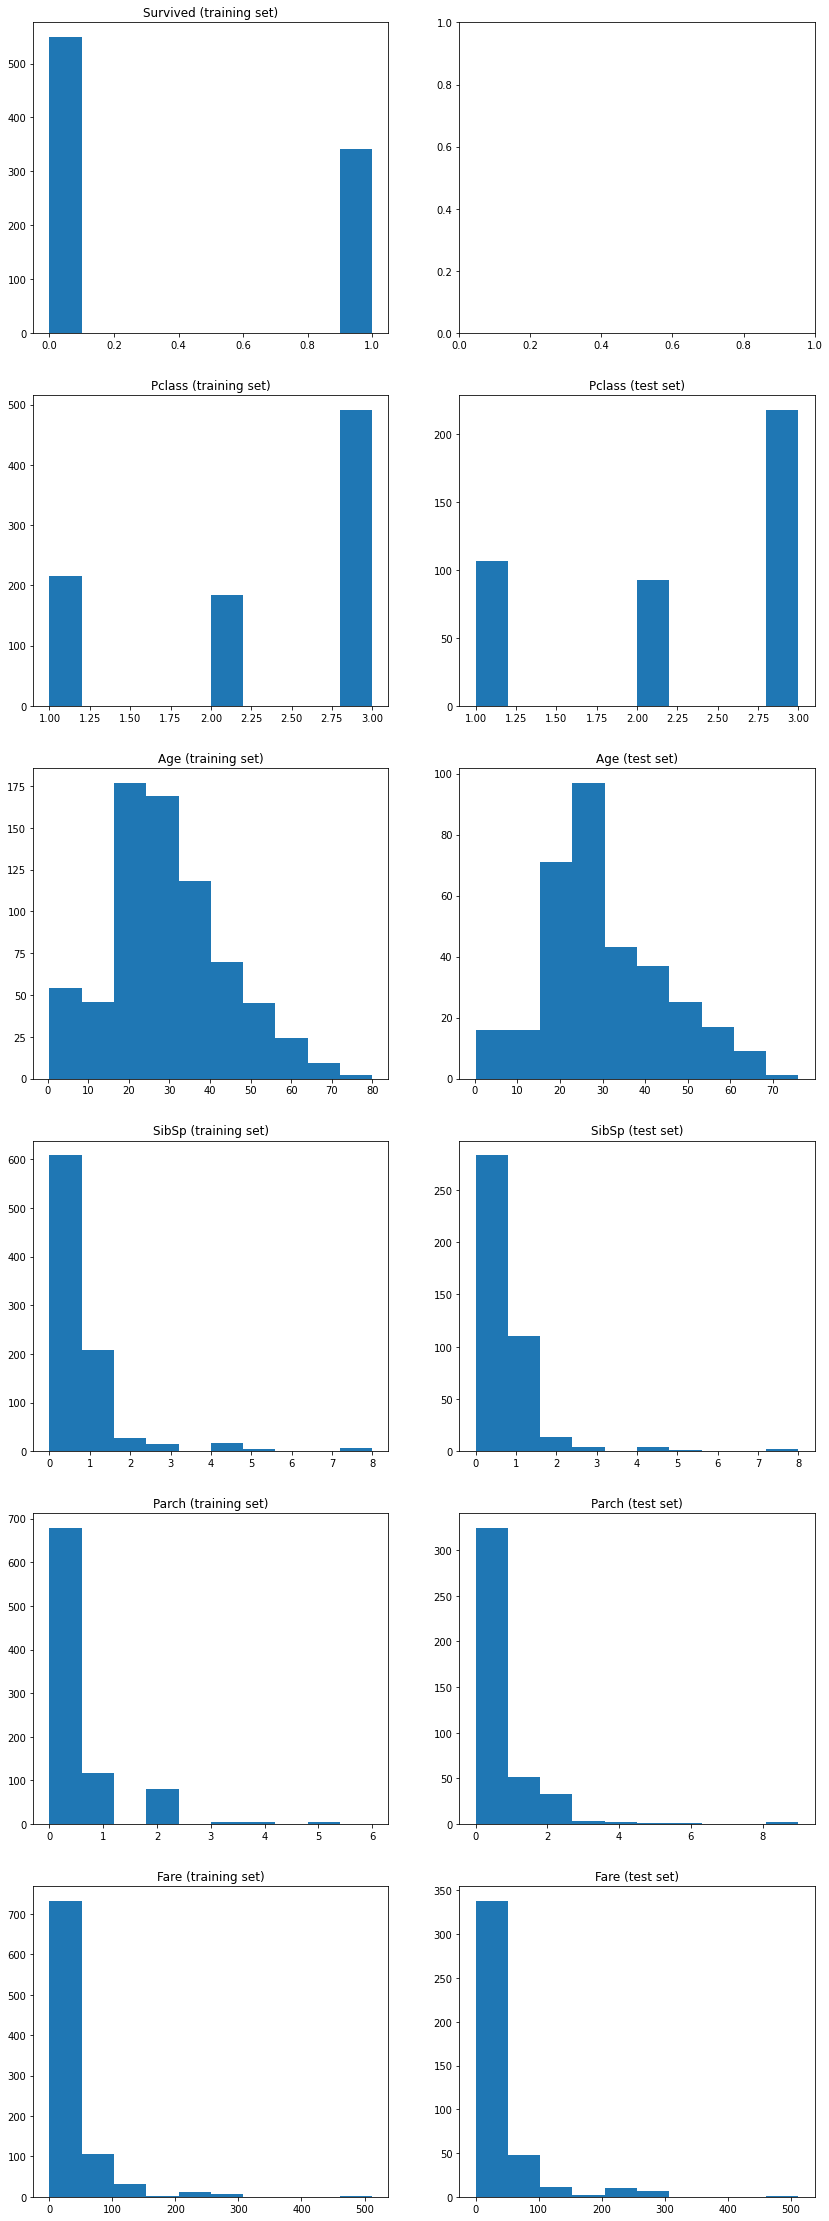

In [11]:
# Using plt.subplots() it is possible to plot many plots under the same figure.
# There are two columns for each feature, one for training set and the other
# for the test set.
fig, ax = plt.subplots(nrows = len(features_numeric), ncols = 2)
fig.set_title = 'Features histograms'
fig.set_size_inches(14, 40)
for i in range(len(features_numeric)):
    ax[i, 0].hist(train.loc[:, features_numeric[i]]);
    ax[i, 0].set_title(f'{features_numeric[i]} (training set)')
    
    if i > 0:
        ax[i, 1].hist(test.loc[:, features_numeric[i]]);
        ax[i, 1].set_title(f'{features_numeric[i]} (test set)')

The fact that the histograms of test and training set have the same patterns reinforce that the train/test split was made randomically.

## Dealing with missing values

Firstly we will deal with the missing values which appear only in one dataset, which are 'Embarked' in the training set and 'Fare' in the test set.

In [12]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both passengers with a missing 'Embarked' value are women with no siblings, spouses, parents or children. Although they had the same first class ticket number and stayed at the same cabin, so it is possible to infer that they had some sort of relationship and probably embarked at the same port, together.

In [13]:
train[(train['Pclass'] == 1)].groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,85,85,85,85,85,74,85,85,85,85,66
Q,2,2,2,2,2,2,2,2,2,2,2
S,127,127,127,127,127,108,127,127,127,127,106


In [14]:
train.groupby(['Embarked']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


Once the majority of the passengers embarked at S (Southampton) — the most frequent port among the first class passengers also —, that will be the value to be assigned for those two ladies.

In [15]:
train['Embarked'].fillna(value = 'S', inplace = True)

Now it is time to take a deeper look at the passenger with a 'Fare' missing value in the test data.

In [16]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In order to assign a proper fare value to Mr. Thomas Storey, we will select passengers which the same feature values of his for Pclass, SibSp, Parch and Sex, grab the mean values of those and assign to him.

In [17]:
mean_fare = test[(test['Pclass'] == 3) & (test['SibSp'] == 0) &
                 (test['Parch'] == 0) & (test['Sex'] == 'male')]['Fare'].mean()
mean_fare

8.613628971962616

In [18]:
test['Fare'].fillna(value = mean_fare, inplace = True)

Now, there are missing datapoints only at columns Age and Cabin, both in train and
test sets. To do that only once, it will be useful to merge train and test sets first. Notice that will be missing values for the Survived feature that came from the test set, because those are the values we aim to predict and are not available at all.

In [19]:
all_data = pd.concat([train, test])
all_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Let us check the size and type of our missing data problem for the whole dataset, which has 1309 rows in total.

In [20]:
len(all_data)

1309

In [21]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [22]:
1014 / 1309 * 100

77.46371275783041

As we can see, there are a enourmous amount of missing values in the Cabin feature, about 77% of the values are missing. So that, it would be useless trying to infer those values based on those ones we already know, but at the same time, knowing the cabin can be quite useful, once their codes are composed by a letter followed by a number. That letter probably is related to specific locations inside the ship and makes sense to think that the nearer to the lifeboats one's cabin is, the greater their survival chances.

So that, in order to retain that important piece of information, the missing values for cabin will be set as a string called 'Unknown', becoming a new category.

In [23]:
all_data['Cabin'].fillna(value = 'Unknown', inplace = True)

In [24]:
263 / 1309 * 100

20.091673032849503

### Age based on name titles

In [25]:
import re

The last feature with missing data is Age, with about 20% of absent values. There are several ways to approach this problem, the most common centainly would be replace those values with the mean value. But analysing the column Names it is possible to notice that all the names have a title included. Once the titles 'master' and 'miss' are for children and youngsters and 'mr.' and  'mrs.' for adults, different average values will be chosen based on name titles.

In [26]:
all_data[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
413,"Spector, Mr. Woolf"
414,"Oliva y Ocana, Dona. Fermina"
415,"Saether, Mr. Simon Sivertsen"
416,"Ware, Mr. Frederick"


In [27]:
re_name_title = re.compile(r'(?<=,.)(\w+)')

In [28]:
all_data['Name Title'] = all_data['Name'].apply(
    lambda x: re_name_title.search(x).group(0))

In [29]:
all_data.groupby(['Name Title']).count()[['PassengerId']]

,PassengerId
Name Title,
Capt,1
Col,4
Don,1
Dona,1
Dr,8
Jonkheer,1
Lady,1
Major,2
Master,61


In [30]:
title_grouped_missing_age = all_data[all_data['Age'].isnull()].groupby('Name Title').count()
title_grouped_missing_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name Title,,,,,,,,,,,,
Dr,1,1,1,1,1,0,1,1,1,1,1,1
Master,8,4,8,8,8,0,8,8,8,8,8,8
Miss,50,36,50,50,50,0,50,50,50,50,50,50
Mr,176,119,176,176,176,0,176,176,176,176,176,176
Mrs,27,17,27,27,27,0,27,27,27,27,27,27
Ms,1,0,1,1,1,0,1,1,1,1,1,1


In [31]:
all_data[['Age', 'Name Title']].groupby('Name Title').mean()

,Age
Name Title,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [32]:
titles = title_grouped_missing_age.index

In [33]:
for title in titles:
    print(all_data.loc[all_data['Name Title'] == title, ['Age', 'Name Title']].sort_values('Age'))

      Age Name Title
398  23.0         Dr
632  32.0         Dr
245  44.0         Dr
796  49.0         Dr
660  50.0         Dr
293  53.0         Dr
317  54.0         Dr
766   NaN         Dr
      Age Name Title
201  0.33     Master
803  0.42     Master
755  0.67     Master
281  0.75     Master
831  0.83     Master
..    ...        ...
709   NaN     Master
244   NaN     Master
339   NaN     Master
344   NaN     Master
417   NaN     Master

[61 rows x 2 columns]
      Age Name Title
354  0.17       Miss
644  0.75       Miss
469  0.75       Miss
250  0.92       Miss
117  1.00       Miss
..    ...        ...
273   NaN       Miss
282   NaN       Miss
304   NaN       Miss
408   NaN       Miss
410   NaN       Miss

[260 rows x 2 columns]
      Age Name Title
731  11.0         Mr
5    14.0         Mr
686  14.0         Mr
230  14.0         Mr
683  14.0         Mr
..    ...        ...
366   NaN         Mr
380   NaN         Mr
384   NaN         Mr
413   NaN         Mr
416   NaN         Mr

[757 ro

/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


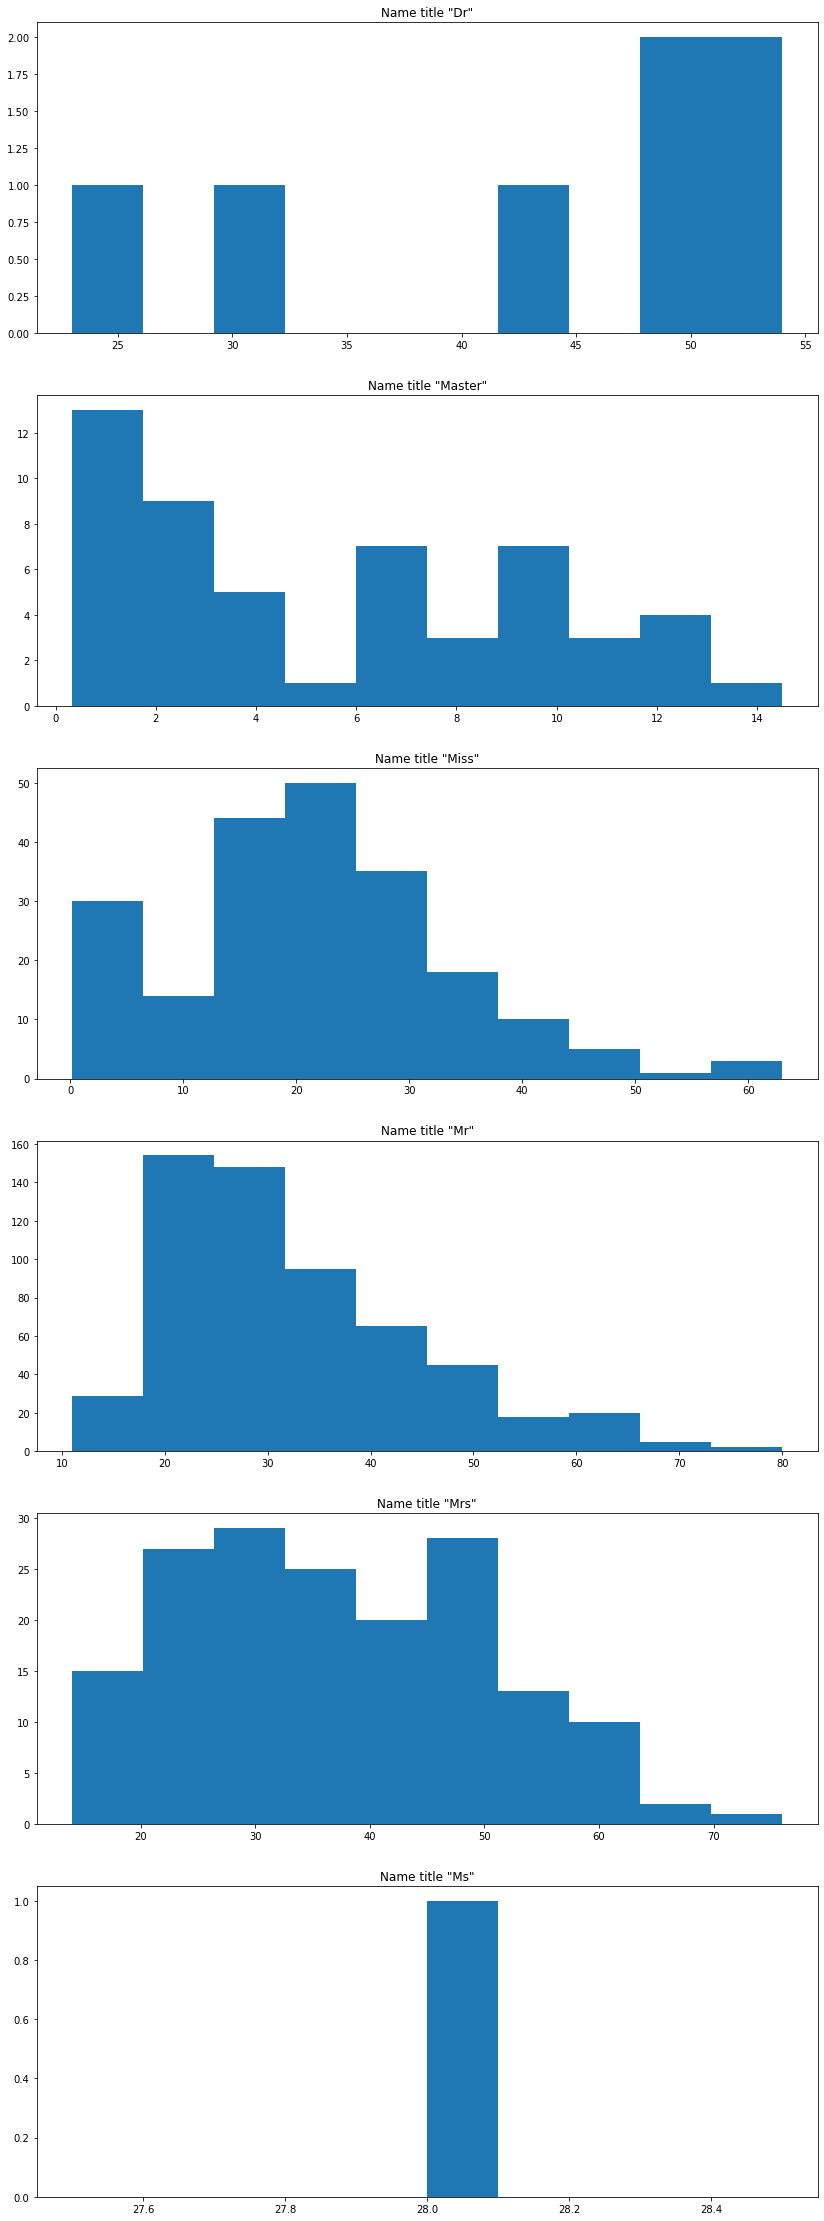

In [34]:
# Using plt.subplots() it is possible to plot many plots under the same figure.
# There are two columns for each feature, one for training set and the other
# for the test set.
fig, ax = plt.subplots(nrows = len(titles), ncols = 1)
fig.set_title = 'Age according to name title'
fig.set_size_inches(14, 40)
for idx, title in enumerate(titles):
    ax[idx].hist(all_data[all_data['Name Title'] == title]['Age'])
    ax[idx].set_title(f'Name title "{title}"');


In [35]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Name Title       0
dtype: int64

In [36]:
mean_std_age = dict()

for title in titles:
    mu = all_data[['Age', 'Name Title']][all_data['Name Title'] == title].mean()[0]
    sd = all_data[['Age', 'Name Title']][all_data['Name Title'] == title].std()[0]
    na_len = len(all_data.loc[(all_data['Name Title'] == title) &
                (all_data['Age'].isnull()), ['Age']])
    
    if np.isnan(sd):
        inputs = np.random.randint(mu, size = na_len)
        all_data.loc[(all_data['Name Title'] == title) &
                     (all_data['Age'].isnull()), ['Age']] = inputs
    else:
        r_min = int(mu - sd)
        r_max = int(mu + sd)
        inputs = np.random.randint(r_min, r_max, na_len)
    
        all_data.loc[(all_data['Name Title'] == title) &
                     (all_data['Age'].isnull()), ['Age']] = inputs

    
    mean_std_age[title] = [mu, sd, inputs]

In [37]:
mean_std_age

{'Dr': [43.57142857142857, 11.731114508820022, array([50])],
 'Master': [5.482641509433963,
  4.161554420638536,
  array([8, 7, 2, 5, 6, 5, 6, 1])],
 'Miss': [21.774238095238097,
  12.249077092096007,
  array([28, 12, 28, 17, 10, 16, 13, 10, 13, 31, 31, 24, 17, 32, 14, 25, 12,
         16, 31, 33, 28, 13, 12, 25, 18, 21, 29, 30, 25, 26, 26, 21, 26, 21,
         25, 12, 21, 32, 19, 14, 25, 12, 23, 33, 11, 15, 25, 23, 32, 27])],
 'Mr': [32.25215146299484,
  12.422088905535148,
  array([20, 22, 35, 31, 36, 30, 26, 40, 37, 35, 38, 24, 32, 36, 37, 40, 24,
         43, 37, 26, 37, 22, 23, 25, 20, 42, 27, 23, 20, 40, 23, 38, 37, 32,
         23, 22, 29, 30, 43, 25, 41, 28, 27, 28, 29, 32, 39, 27, 32, 21, 24,
         23, 36, 24, 27, 26, 21, 22, 32, 38, 38, 30, 32, 25, 39, 34, 38, 34,
         24, 32, 19, 31, 39, 20, 37, 25, 21, 38, 40, 33, 21, 32, 32, 40, 28,
         27, 34, 42, 25, 43, 35, 26, 32, 24, 41, 29, 29, 32, 33, 34, 35, 30,
         21, 26, 33, 43, 38, 29, 40, 33, 43, 26, 21, 41, 2

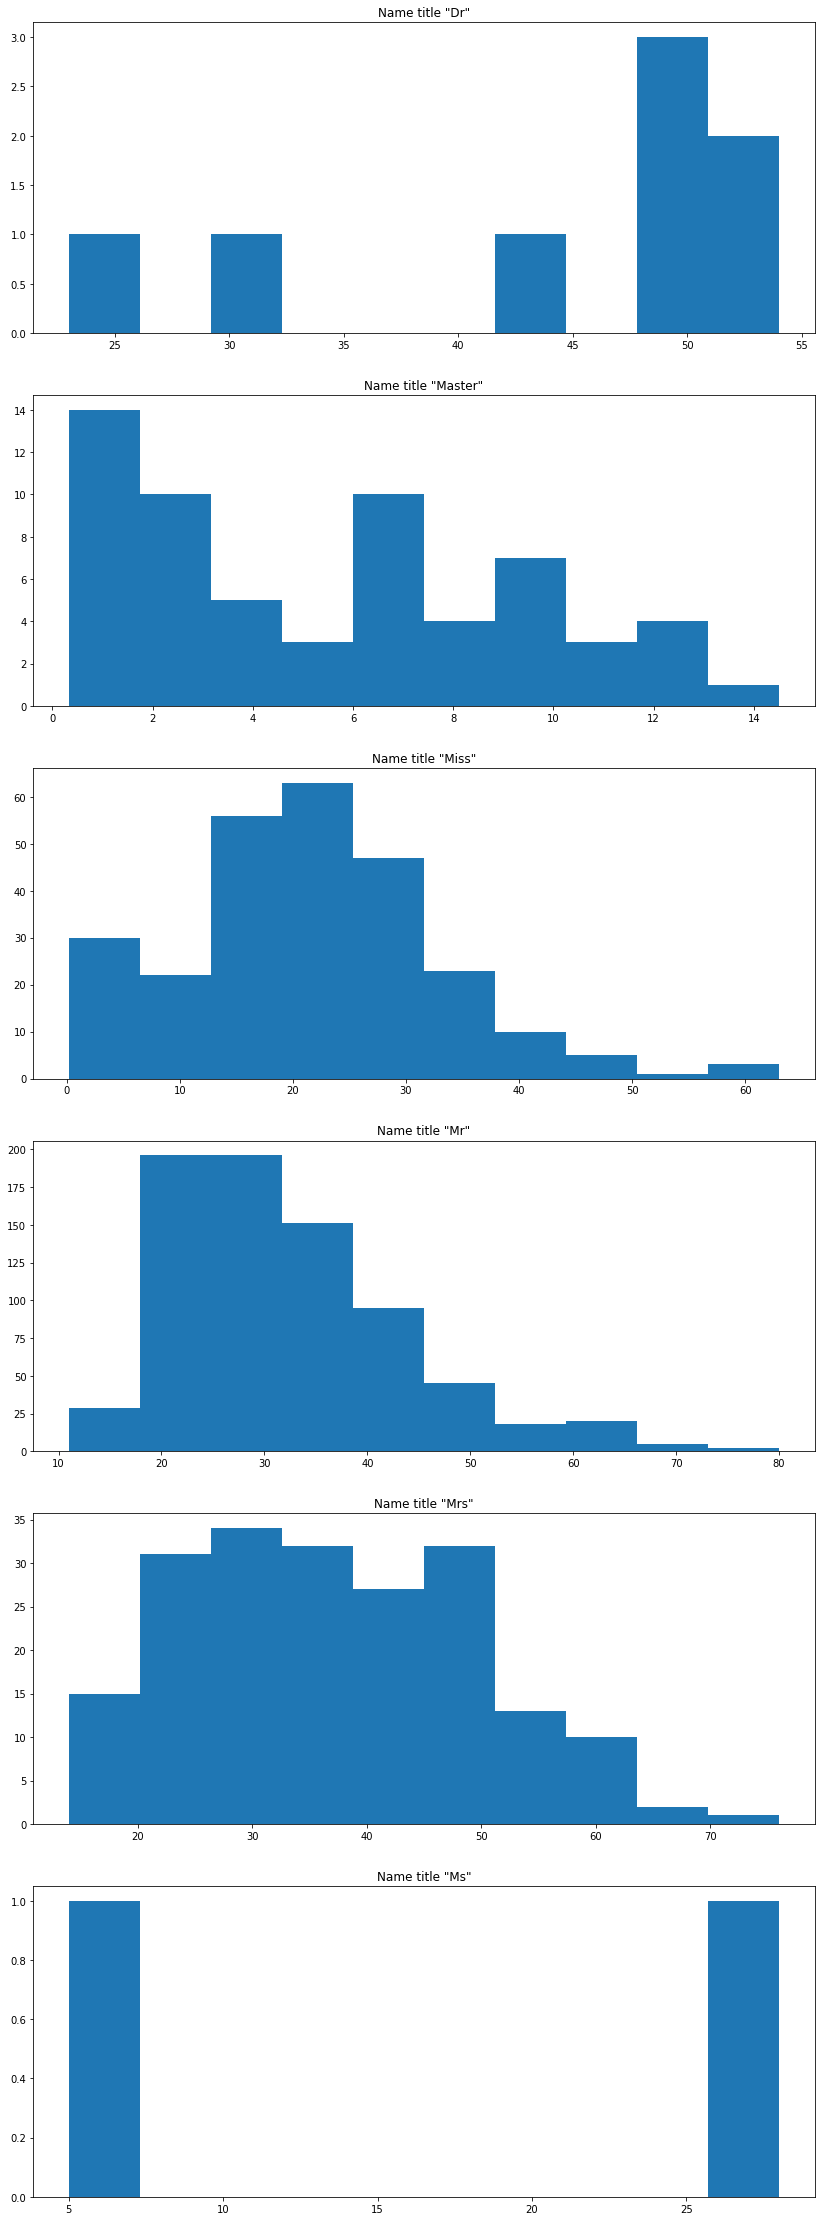

In [38]:
# Using plt.subplots() it is possible to plot many plots under the same figure.
# There are two columns for each feature, one for training set and the other
# for the test set.
fig, ax = plt.subplots(nrows = len(titles), ncols = 1)
fig.set_title = 'Age according to name title'
fig.set_size_inches(14, 40)
for idx, title in enumerate(titles):
    ax[idx].hist(all_data[all_data['Name Title'] == title]['Age'])
    ax[idx].set_title(f'Name title "{title}"');


In [39]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Name Title       0
dtype: int64

Now there is not any missing value for the feature Age and its histograms associated with name titles kept a very similar format, as expected.

## Feature engineering

In [40]:
all_data.groupby(['Cabin']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
A10,584,0.0,1,36.00,0,0,40.125000
A11,1100,0.0,1,33.00,0,0,27.720800
A14,476,0.0,1,32.00,0,0,52.000000
A16,557,1.0,1,48.00,1,0,39.600000
A18,1223,0.0,1,39.00,0,0,29.700000
...,...,...,...,...,...,...,...
F38,777,0.0,3,26.00,0,0,7.750000
F4,3091,2.0,8,53.00,6,6,156.000000
G6,1873,2.0,15,60.00,3,6,71.025000


As mentioned before, the Cabin feature is compose of a letter (which is very likely to be related to a specific location) and a number. So that, in order to grab the letter of the cabin, creating a new feature 'CabinType'.

In [41]:
import re

In [42]:
all_data['CabinType'] = all_data['Cabin'].apply(lambda x: re.sub('\d', '', x.split()[0]))

In [43]:
all_data['CabinType'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Information about the number of parents, children, siblings or spouses are available. Based on those it is possible to figure out if a passenger has a family member or not and its total size (including the themselves)

In [44]:
all_data['numFamilyMembers'] = all_data['Parch'] + all_data['SibSp'] + 1

In [45]:
all_data['HasFamily'] = all_data['numFamilyMembers'].apply(
    lambda x: 1 if (x > 1) else 0)

It is common that, when traveling in family, only one person buys all the tickets. So that, calculate the fare per person can be useful as well.

In [46]:
all_data['AverageFare'] = all_data['Fare'] / (all_data['numFamilyMembers'])

There are two main reasons to think that the younger the passenger, the greater the chance of survival: the ideia of a urge to save the children first and, when talking about young adults, the strength to manage to survive. Nevertheless, is known that first class passengers could have had priority to embark on the lifeboats. Therefore, a feature that can combine those two factors could have a great explanatory capability.

In [47]:
all_data['Age*Class'] = all_data['Age'] * all_data['Pclass']

If we look thoroughly into the feature Names we will see that all names have titles on it, some of them expressing nobility, military or just a common status among society. It might be worthwhile to extract them and create a new feature also.

Let us find out what the title name 'the' means in this context.

In [48]:
all_data[all_data['Name Title'] == 'the'][['Name']]

,Name
759,"Rothes, the Countess. of (Lucy Noel Martha Dye..."


As we can see above, there are titles which are rare and others quite common. In order to generalize this terms, the name titles which appear only 10 times or less will be grouped altogether as 'Rare'.

In [49]:
all_data['Name Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the', 'Jonkheer',
       'Dona'], dtype=object)

In [50]:
common = ['Mr', 'Mrs', 'Miss', 'Master']

def group_title(title):
    
    if title in common:
        return title
    
    else:
        return 'Rare'
    

In [51]:
all_data['Grouped_Title'] = all_data['Name Title'].apply(group_title)

Finally, age groups will be created as well.

In [52]:
def age_group(age):
    if age < 10:
        return 'Child'
    elif age < 18:
        return 'Teenager'
    elif age <= 30:
        return 'Young_Adult'
    elif age <= 45:
        return 'Adult'
    elif age <= 60:
        return 'Senior'
    else:
        return 'Elderly'

In [53]:
all_data['Age Group'] = all_data['Age'].apply(age_group)

In [54]:
all_data[['Age Group', 'Age']]

,Age Group,Age
0,Young_Adult,22.0
1,Adult,38.0
2,Young_Adult,26.0
3,Adult,35.0
4,Adult,35.0
...,...,...
413,Young_Adult,28.0
414,Adult,39.0
415,Adult,38.5
416,Young_Adult,22.0


It is known that a careful feature engineering can be a great way of achieving a outstanding model performance. And looking at the ticket feature we notice that the same ticket can be related to several passengers, so probably those people sharing the same ticket are travel mates who were together at the tragic moment of the sinking. Nevertheless, knowing if the mates of someone survived or not can tell a lot about the chances of one's survival. The feature Mates_Performance aims to capture how well one's mates did on surviving the sinking, as is shown bellow.

In [55]:
def mates_performance(passenger_id):
    ticket = str(
        all_data[all_data['PassengerId'] == passenger_id]['Ticket'].values[0])
    df = all_data.dropna()
    
    mates = len(df[(df['Ticket'] == ticket) &
                   (df['PassengerId'] != passenger_id)])
    
    alive_mates = len(df[(df['Ticket'] == ticket) &
                         (df['Survived'] == 1) &
                         (df['PassengerId'] != passenger_id)])
    
    dead_mates = len(df[(df['Ticket'] == ticket) &
                        (df['Survived'] == 0) &
                        (df['PassengerId'] != passenger_id)])
    
    if (mates == 0) or (alive_mates == dead_mates):
        performance = 0
    
    elif alive_mates > dead_mates:
        performance = (alive_mates / mates) * mates
    
    elif dead_mates > alive_mates:
        performance = ((dead_mates / mates) * mates) * -1
    
    return performance * 100

In [56]:
all_data['Mates_Performance'] = all_data['PassengerId'].apply(mates_performance)

In [57]:
all_data['Mates_Performance'].describe()

count    1309.000000
mean       -7.944996
std       141.143679
min      -700.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       500.000000
Name: Mates_Performance, dtype: float64

## Categorical Variables

Once the feature engineering is finished, it is time to deal with all the categorical variables, making dummies bases on them.

In [58]:
df_pclass_dummies = pd.get_dummies(all_data['Pclass'])
col_names = ['Pclass_' + str(col) for col in df_pclass_dummies]
df_pclass_dummies.columns = col_names
df_pclass_dummies

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [59]:
df_dummies = pd.get_dummies(all_data[['Sex', 'CabinType', 'Grouped_Title',
                                      'Name Title', 'Embarked', 'Age Group']])

In [60]:
raw_dataset = pd.concat([all_data, df_pclass_dummies, df_dummies],
                          axis = 1)

In [61]:
raw_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name Title',
       'CabinType', 'numFamilyMembers', 'HasFamily', 'AverageFare',
       'Age*Class', 'Grouped_Title', 'Age Group', 'Mates_Performance',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'CabinType_A', 'CabinType_B', 'CabinType_C', 'CabinType_D',
       'CabinType_E', 'CabinType_F', 'CabinType_G', 'CabinType_T',
       'CabinType_Unknown', 'Grouped_Title_Master', 'Grouped_Title_Miss',
       'Grouped_Title_Mr', 'Grouped_Title_Mrs', 'Grouped_Title_Rare',
       'Name Title_Capt', 'Name Title_Col', 'Name Title_Don',
       'Name Title_Dona', 'Name Title_Dr', 'Name Title_Jonkheer',
       'Name Title_Lady', 'Name Title_Major', 'Name Title_Master',
       'Name Title_Miss', 'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Mr',
       'Name Title_Mrs', 'Name Title_Ms', 'Name Title_Rev', 'Name Title_Sir',
       'Name Titl

## Creating the final dataset

### Dataset list

A considerable number of features were created, therefore many combinations of variables can be used as a final dataset in which the models can be applied. So that a list of datasets will be created and the most efficient will be chosen through a grid search.

In [62]:
datasets = dict()

In [63]:
# Dataset with all possible features
datasets['all_features']= raw_dataset[[
    'Mates_Performance',
    'Pclass',
    'Age',
    'SibSp',
    'Parch', 
    'Fare',
    'numFamilyMembers',
    'HasFamily',
    'AverageFare',
    'Age*Class',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'Sex_female', 'Sex_male',
    'CabinType_A',
    'CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
    'CabinType_F', 'CabinType_G', 'CabinType_T',
    'CabinType_Unknown',
    'Grouped_Title_Master', 'Grouped_Title_Miss',
    'Grouped_Title_Mr', 'Grouped_Title_Mrs',
    'Grouped_Title_Rare',
    'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
    'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
    'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
    'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
    'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
    'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [64]:
# Dataset with only grouped features
datasets['only_grouped'] = raw_dataset[[
    'Mates_Performance',
    'Pclass',
#     'Age',
    'SibSp',
    'Parch', 
    'Fare',
    'numFamilyMembers',
    'HasFamily',
    'AverageFare',
    'Age*Class',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'Sex_female', 'Sex_male',
    'CabinType_A', 'CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
    'CabinType_F', 'CabinType_G', 'CabinType_T',
    'CabinType_Unknown',
    'Grouped_Title_Master', 'Grouped_Title_Miss',
    'Grouped_Title_Mr', 'Grouped_Title_Mrs',
    'Grouped_Title_Rare',
#     'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
#     'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
#     'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
#     'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
#     'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
    'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
    'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [65]:
# Dataset with no grouped features
datasets['no_grouped'] = raw_dataset[[
    'Mates_Performance',
    'Pclass',
    'Age',
    'SibSp',
    'Parch', 
    'Fare',
#     'numFamilyMembers',
    'HasFamily',
    'AverageFare',
    'Age*Class',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'Sex_female', 'Sex_male',
    'CabinType_A','CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
    'CabinType_F', 'CabinType_G', 'CabinType_T',
    'CabinType_Unknown',
#     'Grouped_Title_Master', 'Grouped_Title_Miss',
#     'Grouped_Title_Mr', 'Grouped_Title_Mrs',
#     'Grouped_Title_Rare',
    'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
    'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
    'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
    'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
    'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
    'Embarked_C', 'Embarked_Q', 'Embarked_S',
#     'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
#     'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [66]:
# Dataset with features I consider the most relevant
datasets['my_favorite'] = raw_dataset[[
    'Mates_Performance',
    'Pclass',
    'Age',
    'SibSp',
    'Parch', 
#     'Fare',
#     'numFamilyMembers',
    'HasFamily',
#     'AverageFare',
    'Age*Class',
#     'Pclass_1',
#     'Pclass_2',
#     'Pclass_3',
    'Sex_female',
#     'Sex_male',
#      'CabinType_A', 
    'CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
#     'CabinType_F', 'CabinType_G', 'CabinType_T',
    'CabinType_Unknown',
    'Grouped_Title_Master', 'Grouped_Title_Miss',
    'Grouped_Title_Mr', 'Grouped_Title_Mrs',
#     'Grouped_Title_Rare',
#     'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
#     'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
#     'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
#     'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
#     'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
    'Embarked_C',
#     'Embarked_Q',
    'Embarked_S',
#     'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
#     'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [67]:
# Minimalist Dataset
datasets['minimalist']  = raw_dataset[[
    'Mates_Performance',
#     'Pclass',
#     'Age',
#     'SibSp',
#     'Parch', 
#     'Fare',
#     'numFamilyMembers',
    'HasFamily',
#     'AverageFare',
    'Age*Class',
    'Pclass_1',
#     'Pclass_2',
    'Pclass_3',
    'Sex_female',
#     'Sex_male',
#     'CabinType_A', 'CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
#     'CabinType_F', 'CabinType_G', 'CabinType_T',
#     'CabinType_Unknown',
#     'Grouped_Title_Master', 'Grouped_Title_Miss',
#     'Grouped_Title_Mr', 'Grouped_Title_Mrs',
#     'Grouped_Title_Rare',
#     'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
#     'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
#     'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
#     'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
#     'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
#     'Embarked_C', 'Embarked_Q', 'Embarked_S',
#     'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
#     'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [68]:
# Dataset with no feature engineering
datasets['no_feature_engineering']= raw_dataset[[
#     'Mates_Performance',
    'Pclass',
    'Age',
    'SibSp',
    'Parch', 
    'Fare',
#     'numFamilyMembers',
#     'HasFamily',
#     'AverageFare',
#     'Age*Class',
    'Pclass_1', 'Pclass_2', 'Pclass_3',
    'Sex_female', 'Sex_male',
#     'CabinType_A',
#     'CabinType_B', 'CabinType_C','CabinType_D', 'CabinType_E',
#     'CabinType_F', 'CabinType_G', 'CabinType_T',
#     'CabinType_Unknown',
#     'Grouped_Title_Master', 'Grouped_Title_Miss',
#     'Grouped_Title_Mr', 'Grouped_Title_Mrs',
#     'Grouped_Title_Rare',
#     'Name Title_Mr','Name Title_Mrs', 'Name Title_Master', 'Name Title_Miss',
#     'Name Title_Capt', 'Name Title_Col', 'Name Title_Don', 'Name Title_Dona',
#     'Name Title_Dr', 'Name Title_Jonkheer','Name Title_Major',
#     'Name Title_Mlle', 'Name Title_Mme', 'Name Title_Lady', 'Name Title_Ms',
#     'Name Title_Rev', 'Name Title_Sir', 'Name Title_the',
#     'Embarked_C', 'Embarked_Q', 'Embarked_S',
#     'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
#     'Age Group_Senior','Age Group_Teenager', 'Age Group_Young_Adult',
    'Survived'
]]

In [69]:
len(datasets)

6

### Train test split and scaling

After cleaning the datasets, it is time to do the train/test split (as well as the feature scaling) for each of them. Although the test results are unavailable on the test.csv file, it is possible to get the final accuracy results on Kaggle plataform.

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
train = []
x_train = []
y_train = []

test = []
x_test = []
y_test = []

idx = 0

sc = StandardScaler()

for key, dataset in datasets.items():
    train.append(dataset[dataset['Survived'].isnull() == False])
    test.append(dataset[dataset['Survived'].isnull() == True])
    
    x_train.append(train[idx].drop('Survived', axis = 1))
    y_train.append(train[idx]['Survived'].values) # sklearn usually expects an array here
    
    x_test.append(test[idx].drop('Survived', axis = 1))
    y_test.append(test[idx]['Survived'].values)
    
    sc.fit(dataset.drop('Survived', axis = 1))
    x_train[idx] = sc.transform(x_train[idx])
    x_test[idx] = sc.transform(x_test[idx])
    
    idx = idx + 1

### Correlations

Now that all the dummie variables were created and we have several combinations of datasets, we will calculate the absolute correlation of each feature on the target variable Survived in order to know their individual importance on predicting whether a passenger managed to stay alive after the sinking.

In [72]:
col_list = []
corr_list = []
for feature in train[0].columns:
    col_list.append(feature)
    corr_list.append(abs(np.corrcoef(train[0][feature], train[0]['Survived'])[0][1]))

df_corr = pd.DataFrame({'Feature': col_list, 'Absolute Correlation': corr_list})

/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ronye/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [73]:
df_corr.sort_values(by = 'Absolute Correlation', ascending = False)

,Feature,Absolute Correlation
56,Survived,1.000000
29,Name Title_Mr,0.549199
26,Grouped_Title_Mr,0.549199
14,Sex_male,0.543351
13,Sex_female,0.543351
30,Name Title_Mrs,0.339040
27,Grouped_Title_Mrs,0.339040
1,Pclass,0.338481
9,Age*Class,0.331619
32,Name Title_Miss,0.327093


# Creating models

## Choosing the best dataset

The first step to do in order to build the best possible model is to test several types of classifiers and then evaluate which yields the best results. To do so, we will create a ClassifierSwitcher class which is a child class of BaseEstimator. Through this method we can switch among the classifiers we choose all at once using a Pipeline.

In [74]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression as LR
class ClassifierSwitcher(BaseEstimator):

    def __init__(self, estimator = LR()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y = None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y = None):
        return self.estimator.predict(X)

    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    def score(self, X, y):
        return self.estimator.score(X, y)

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [76]:
pipeline = Pipeline([('clf', ClassifierSwitcher())])

In [77]:
# Adding all the classifiers we want to test
parameters_general = [
    {'clf__estimator': [(LogisticRegression())]},
    
    {'clf__estimator': [(GaussianNB())]},
    
    {'clf__estimator': [(SVC())]},
    
    {'clf__estimator': [(DecisionTreeClassifier())]},
    
    {'clf__estimator': [(RandomForestClassifier())]},
    
    {'clf__estimator': [(AdaBoostClassifier())]},

    {'clf__estimator': [(XGBClassifier())]}
]

For each possible dataset, we will perform a 5-fold cross validation on each classifier. So that we can evaluate what classifier performed bette on a given dataset scenario.

In [78]:
gscv_pipeline_general = []

for idx, x in enumerate(x_train):
    gscv_pipeline_general.append(
        GridSearchCV(pipeline, parameters_general, cv = 5, n_jobs = -1,
                     return_train_score = False, verbose = 0))
    
    gscv_pipeline_general[idx].fit(x_train[idx], y_train[idx])

In [79]:
key_dataset = tuple(datasets)
for idx, estimator in enumerate(gscv_pipeline_general):
    print(idx, key_dataset[idx], estimator.best_params_, estimator.best_score_)

0 all_features {'clf__estimator': LogisticRegression()} 0.835019772770071
1 only_grouped {'clf__estimator': LogisticRegression()} 0.8372669637813068
2 no_grouped {'clf__estimator': LogisticRegression()} 0.83841566756638
3 my_favorite {'clf__estimator': LogisticRegression()} 0.8428974954491244
4 minimalist {'clf__estimator': SVC()} 0.835019772770071
5 no_feature_engineering {'clf__estimator': SVC()} 0.8237838177138912


These results give a lot of food to thought. First of all, the importance of a clever feature engineering is evident, once the minimalist dataset with only key features performed considerably better than the one with no made up features.

The performance of the Logistic Regression classifier is just amazing giving its simplicity, and it also shows that for this case, grouping to many features does not lead to better results.

At last, the dataset which was thought carefully, using the most important features given their correlations, avoiding superposition (such as Pclass with AverageFare), was the one which performed better, and did so through one of the most powerful machine learning algorithms available: XGBoost. But at the same time, the best result is just about 0.5 better than the second one, the no_grouped dataset using Logistic Regression. It shows us that we cannot underestimate the simple models.

## Exploiting the best dataset

The dataset of index 3 achieved the best performance through the XGBoost classifier, but we do not know yet how well the other models performed on that dataset. Let us find out now.

In [80]:
classifiers = gscv_pipeline_general[3].cv_results_['param_clf__estimator']
results = gscv_pipeline_general[3].cv_results_['mean_test_score']

for i in range(0, len(classifiers)):
    print(str(classifiers[i]).split()[0],'\n', results[i], '\n')

LogisticRegression() 
 0.8428974954491244 

GaussianNB() 
 0.8137216747222397 

SVC() 
 0.8327663046889713 

DecisionTreeClassifier() 
 0.7890276818780994 

RandomForestClassifier() 
 0.8114744837110036 

AdaBoostClassifier() 
 0.8316615403929445 

XGBClassifier(base_score=None, 
 0.8249199673592367 



Once again, the Logistic Regression classifier had an outstanding performance, almost as good as XGBoost and better than any result of the others datasets, SVC retrieved a fair accuracy score as well. So that, another round of Grid Search will be done to tune the hyperparameters of each of those three classifiers and see how much they can be improved

### Tunning hyperparameters

#### XGBoost Classifier

In [81]:
xgb_param_grid = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
                  "n_estimators": [100],
                  "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
                  "min_child_weight": [1, 3, 5, 7],
                  "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4],
                  "colsample_bytree": [0.3, 0.4, 0.5, 0.7]}

In [82]:
gscv_xgb = GridSearchCV(XGBClassifier(), xgb_param_grid, n_jobs = -1, cv = 5,
                       verbose = 3)

In [83]:
gscv_xgb.fit(x_train[3], y_train[3])

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 4536 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6200 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 8120 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 10296 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 12728 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 15416 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 18360 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 19193 out of 19200 | elapsed:  7.8min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 19200 out of 19200 | elapsed:  7.8min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,
                                     validate_parameters=False,
                  

In [84]:
gscv_xgb.best_score_

0.8496076831335133

In [85]:
xgb = gscv_xgb.best_estimator_

#### Logistic Regression Classifier

In [86]:
lr_param_grid = {'penalty' : ['l1', 'l2'],
                 'C' : np.logspace(-4, 4, 20),
                 'solver' : ['liblinear']}

In [87]:
gscv_lr = GridSearchCV(LogisticRegression(), lr_param_grid, n_jobs = -1, cv = 5,
                       verbose = 3)

In [88]:
gscv_lr.fit(x_train[3], y_train[3])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=3)

In [89]:
gscv_lr.best_score_

0.8428786642395331

In [90]:
lr = gscv_lr.best_estimator_

#### SVM Classifier

In [91]:
# Tunning SVM
svc_param_grid = {'C': [0.1,1, 10, 100],
                  'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid']}

In [92]:
gscv_svm = GridSearchCV(estimator = SVC(), param_grid = svc_param_grid,
                        refit = True, n_jobs = - 1, cv = 5, verbose = 3)

In [93]:
gscv_svm.fit(x_train[3], y_train[3])

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  9.3min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [94]:
gscv_svm.best_score_

0.8484840876278954

In [95]:
svm = gscv_svm.best_estimator_

#### Tuned models results

In [96]:
model_score = [['XGBoost', gscv_xgb.best_score_],
               ['Logistic Regression', gscv_lr.best_score_],
               ['SVC', gscv_svm.best_score_]]
for model, score in model_score:
    print(model, '\n', score, '\n')

XGBoost 
 0.8496076831335133 

Logistic Regression 
 0.8428786642395331 

SVC 
 0.8484840876278954 



After the parameter tunning the SVM Classifier outperformed the Logistic Regression one (which also increased its score), whereas the XGBoost improved its performance and stayed at the first place.

## The final model

Although XGBoost has proved its value, the other two classifiers showed great results as well. So that we will ensemble a new model called voting_classifier, combining all three of them and assing a weight 3 for XGBoost and 2 for each of the others. So when XGBoost predicts a result while SVM and Logist Regression both predict another, voting_classifier sticks with the later two. In any other case, it will stick with XGBoost. Therefore, a possible wrong prediction can be avoided.

In [97]:
from sklearn.ensemble import VotingClassifier as VC
from sklearn.model_selection import cross_val_score

In [98]:
voting_classifier = VC(estimators = [('XGBoost', xgb),
                                     ('SVM', svm),
                                     ('Logistic Regression', lr)],
                          voting = 'hard', weights = [3, 2, 2])

In [99]:
voting_classifier.fit(x_train[3], y_train[3])

VotingClassifier(estimators=[('XGBoost',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.3, gamma=0.2,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=5,
                                            missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=0,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                

In [100]:
vc_scores = cross_val_score(voting_classifier, x_train[3], y_train[3], cv = 5)
vc_scores

array([0.84357542, 0.83707865, 0.84269663, 0.83707865, 0.89325843])

In [101]:
vc_scores.mean()

0.8507375557089951

# Predictions

In [102]:
test_id = pd.read_csv('datasets/test.csv')
test_id.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
test_id = test_id['PassengerId'].values

In [104]:
predictions = xgb.predict(x_test[3]) # KAGGLE SCORE 0.77990

In [105]:
predictions = svm.predict(x_test[3]) # KAGGLE SCORE 0.75837

In [106]:
predictions = lr.predict(x_test[3])  # KAGGLE SCORE 0.77033

In [107]:
predictions = voting_classifier.predict(x_test[3]) # KAGGLE SCORE 0.77272

In [108]:
# submission = pd.DataFrame(data = {'PassengerId': test_id,
#                                   'Survived': predictions})
# submission['Survived'] = submission['Survived'].apply(lambda x: int(x))

In [109]:
# submission.to_csv(r'/home/ronye/Desktop/Estudo/Data Science/Projects/Kaggle/Titanic/submissions/VC.csv',
#                   header = True,
#                   index = False)